<a href="https://colab.research.google.com/github/Jpeacock1o3/DSRP-Research/blob/main/SchoolResearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
url = 'https://raw.githubusercontent.com/Jpeacock1o3/DSRP-Research/refs/heads/main/OECD%2CDF_BLI%2C%2Ball%20(1).csv'
Wildlife = pd.read_csv(url)

In [ ]:
Wildlife.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X                                           3023 non-null   float64
 1   Y                                           3023 non-null   float64
 2   Unique Squirrel ID                          3023 non-null   object 
 3   Hectare                                     3023 non-null   object 
 4   Shift                                       3023 non-null   object 
 5   Date                                        3023 non-null   int64  
 6   Hectare Squirrel Number                     3023 non-null   int64  
 7   Age                                         2902 non-null   object 
 8   Primary Fur Color                           2968 non-null   object 
 9   Highlight Fur Color                         1937 non-null   object 
 10  Combination 

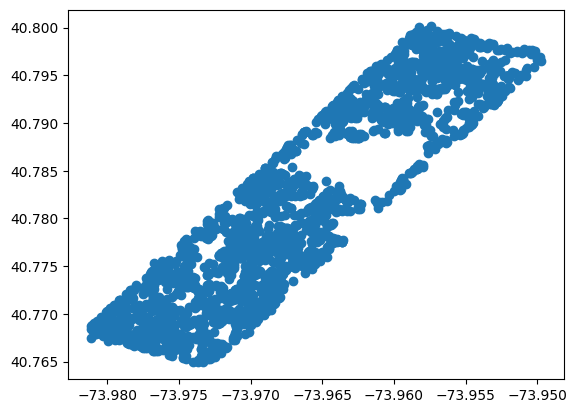

In [ ]:
plt.scatter(Wildlife['GDP'], Wildlife['Unemployment rate'])

/tmp/ipython-input-11-2110125960.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Shift'].fillna("Unknown Shift", inplace=True)
/tmp/ipython-input-11-2110125960.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

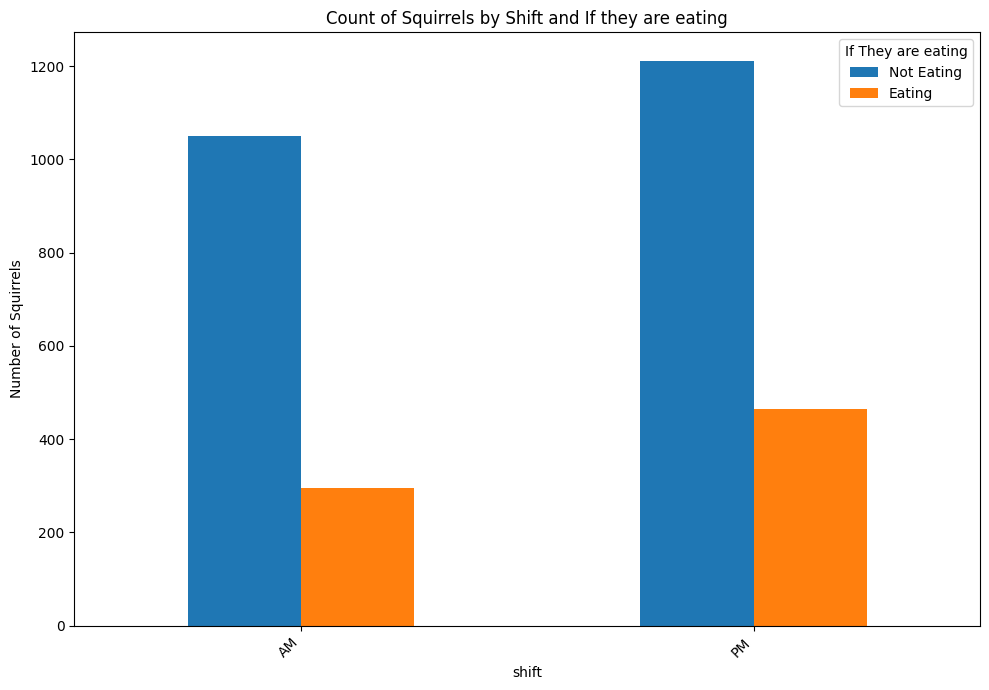

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('https://raw.githubusercontent.com/Jpeacock1o3/DSRP-Research/refs/heads/main/2018_Central_Park_Squirrel_Census_-_Squirrel_Data_20250721.csv')


df['Shift'].fillna("Unknown Shift", inplace=True)

#
df['Eating'] = df['Eating'].astype(str).str.lower().map({'true': True, 'false': False})
df['Eating'].fillna(False, inplace=True) # Fill any remaining NaNs in 'Tail flags'


tail_flags_by_location = df.groupby('Shift')['Eating'].value_counts().unstack(fill_value=0)


tail_flags_by_location.rename(columns={False: 'Not Eating', True: 'Eating'}, inplace=True)



plt.figure(figsize=(10, 7))


tail_flags_by_location.plot(kind='bar', ax=plt.gca())

plt.title('Count of Squirrels by Shift and If they are eating')
plt.xlabel('shift')
plt.ylabel('Number of Squirrels')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.legend(title='If They are eating')
plt.tight_layout() # Adjust layout
plt.show()

In [ ]:
specific_location = tail_flags_by_location.loc[['Above Ground', 'Ground Plane']].copy()
specific_location['Total'] = specific_location['No Tail Flags'] + specific_location['Tail Flags']
specific_location['Percentage'] = (specific_location['Tail Flags'] / specific_location['Total']) * 100
print(specific_location['Percentage'])

Location
Above Ground    4.982206
Ground Plane    5.340265
Name: Percentage, dtype: float64


In [ ]:
Wildlife['Location'].fillna("Unknown Location", inplace=True)
Wildlife['Tail flags'] = Wildlife['Tail flags'].astype(str).str.lower().map({'true': True, 'false': False, 'nan': np.nan})

In [ ]:
Wildlife['Tail flags'].fillna(False, inplace=True)

/tmp/ipython-input-23-89493883.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Wildlife['Tail flags'].fillna(False, inplace=True)


In [ ]:
tail_flags_by_location = Wildlife.groupby('Location')['Tail flags'].value_counts().unstack(fill_value=0)


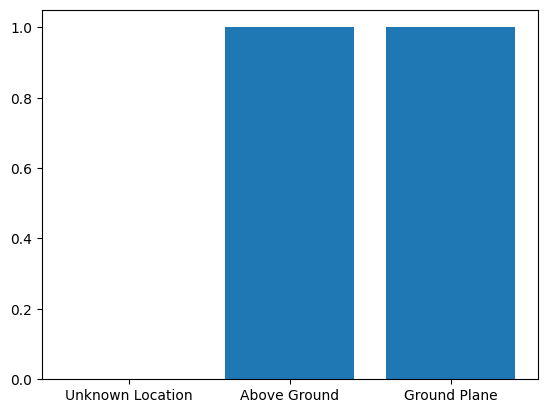

In [ ]:
plt.bar(Wildlife['Location'], Wildlife['Tail flags'])
plt.show()

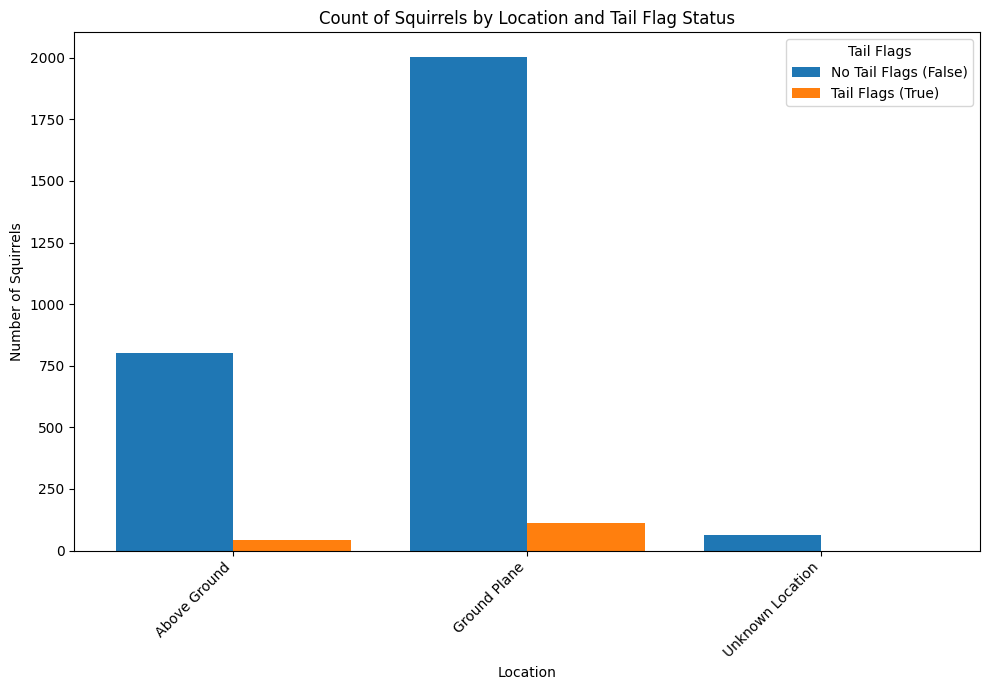

In [ ]:
# Plotting a grouped bar chart
fig, ax = plt.subplots(figsize=(10, 7))

# Plot bars for 'False' (no tail flags)
ax.bar(tail_flags_by_location.index, tail_flags_by_location[False], width=0.4, label='No Tail Flags (False)', align='center')

# Plot bars for 'True' (tail flags)
# Shift the bars slightly to the right to create a grouped effect
bar_width = 0.4
x_pos_true = np.arange(len(tail_flags_by_location.index)) + bar_width
ax.bar(x_pos_true, tail_flags_by_location[True], width=0.4, label='Tail Flags (True)', align='center')


# Adjust x-axis ticks and labels
ax.set_xticks(np.arange(len(tail_flags_by_location.index)) + bar_width / 2)
ax.set_xticklabels(tail_flags_by_location.index, rotation=45, ha='right')

ax.set_title('Count of Squirrels by Location and Tail Flag Status')
ax.set_xlabel('Location')
ax.set_ylabel('Number of Squirrels')
ax.legend(title='Tail Flags')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig('location_vs_tail_flags_bar_chart.png')
plt.show() # Display the plot

TypeError: 'value' must be an instance of str or bytes, not a float

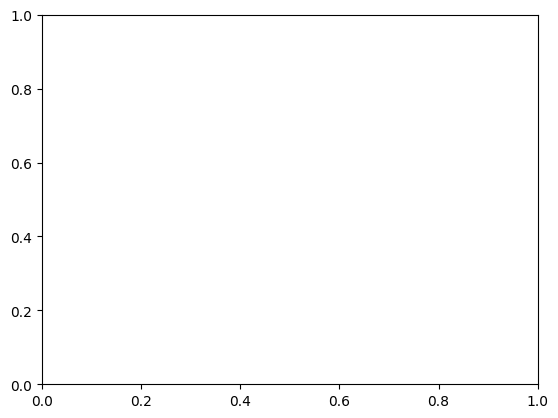

In [ ]:
plt.bar(Wildlife['Location'], Wildlife['Tail flags'])
plt.show()

In [ ]:

Newsub = Wildlife.dropna(subset=['Location'])
print(Newsub['Location'].unique())

['Above Ground' 'Ground Plane']


In [ ]:
Newsub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2959 entries, 2 to 3022
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X                                           2959 non-null   float64
 1   Y                                           2959 non-null   float64
 2   Unique Squirrel ID                          2959 non-null   object 
 3   Hectare                                     2959 non-null   object 
 4   Shift                                       2959 non-null   object 
 5   Date                                        2959 non-null   int64  
 6   Hectare Squirrel Number                     2959 non-null   int64  
 7   Age                                         2853 non-null   object 
 8   Primary Fur Color                           2919 non-null   object 
 9   Highlight Fur Color                         1905 non-null   object 
 10  Combination of Pr

In [ ]:
Wildlife.shape[0]

3023

In [ ]:
Wildlife['Age'] = Wildlife['Age'].fillna(value='Unknown')

In [ ]:
Wildlife.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,Unknown,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,Unknown,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,Unknown,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [ ]:
EraseSub=Wildlife.dropna()

In [ ]:
EraseSub.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
2253,-73.970999,40.772576,10F-PM-1019-03,10F,PM,10192018,3,Juvenile,Gray,Cinnamon,...,False,False,False,False,False,True,False,False,approaches (bad tourists w/ nuts),POINT (-73.9709991016317 40.772575670774806)


In [ ]:
pip install ucimlrepo

In [ ]:

from ucimlrepo import fetch_ucirepo

# fetch dataset
School_data = fetch_ucirepo(id=697)

# data (as pandas dataframes)
School_features = School_data.data.features
School_targets = School_data.data.targets

School_features.head()




,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [ ]:
url = '/content/OECD,DF_BLI,+all (1).csv'
Health = pd.read_csv(url)
Health.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,...,OBS_VALUE,Observation Value,OBS_STATUS,Observation Status,UNIT_MEASURE,Unit of Measures,UNIT_MULT,Multiplier,BASE_PER,Base reference period
0,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,...,2.3,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN
1,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,...,2.4,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN
2,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,...,3.8,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN
3,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,CZE,Czechia,JE_LMIS,Labour market insecurity,L,Value,...,2.3,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN
4,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,DNK,Denmark,JE_LMIS,Labour market insecurity,L,Value,...,4.5,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN


In [ ]:
url = '/content/OECD.WISE.CWB,DSD_CWB@DF_CWB,1.0+..A1.csv'
Child = pd.read_csv(url)

Child.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,MEASURE,Measure,DOMAIN,Domain,...,UNIT_MULT,Unit multiplier,UNIT_MEASURE,Unit of measure,BASE_PER,Base period,DECIMALS,Decimals,POP_GROUP,Population group
0,DATAFLOW,OECD.WISE.CWB:DSD_CWB@DF_CWB(1.0),Child well-being,I,AUS,Australia,A1_4,Students who report not having an internet con...,A1,Material outcomes,...,0,Units,PT_ST,Percentage of students,NaN,NaN,1,One,STUDENT_15,Students at age 15
1,DATAFLOW,OECD.WISE.CWB:DSD_CWB@DF_CWB(1.0),Child well-being,I,AUT,Austria,A1_4,Students who report not having an internet con...,A1,Material outcomes,...,0,Units,PT_ST,Percentage of students,NaN,NaN,1,One,STUDENT_15,Students at age 15
2,DATAFLOW,OECD.WISE.CWB:DSD_CWB@DF_CWB(1.0),Child well-being,I,BEL,Belgium,A1_4,Students who report not having an internet con...,A1,Material outcomes,...,0,Units,PT_ST,Percentage of students,NaN,NaN,1,One,STUDENT_15,Students at age 15
3,DATAFLOW,OECD.WISE.CWB:DSD_CWB@DF_CWB(1.0),Child well-being,I,CAN,Canada,A1_4,Students who report not having an internet con...,A1,Material outcomes,...,0,Units,PT_ST,Percentage of students,NaN,NaN,1,One,STUDENT_15,Students at age 15
4,DATAFLOW,OECD.WISE.CWB:DSD_CWB@DF_CWB(1.0),Child well-being,I,CHL,Chile,A1_4,Students who report not having an internet con...,A1,Material outcomes,...,0,Units,PT_ST,Percentage of students,NaN,NaN,1,One,STUDENT_15,Students at age 15
